## Test 2

### Imports and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
import math

In [22]:
def plot_subplots(*args, titles=None, xlabel='X', ylabel='Y', x=0, y=[1], sup_title=None, save=False, start=0, end=-1, 
                  use_twiny=False, size = 0.5):
    """
    Plot multiple 1D data arrays in a grid of subplots.

    Parameters:
    - *args: Arbitrary number of 2D arrays/lists to plot.
    - titles: Optional list of subplot titles.
    - xlabel, ylabel: Axis labels for each subplot.
    - x: Index of x-axis data column.
    - y: List of indices for y-axis data columns.
    - sup_title: Super title for the whole figure.
    - save: Whether to save the plot.
    - start, end: Slice indices for plotting.
    - use_twiny: If True, add a twiny x-axis to the last subplot.
    """
    n = len(args)
    y_list = [y] if isinstance(y, int) else list(y)
    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows), sharey=use_twiny)
    axes = np.atleast_1d(axes).flatten()

    for i, data in enumerate(args):
        ax = axes[i]
        x_data = data[start:end, x]
        for y_index in y_list:
            if use_twiny and y_index == y_list[-1]:
                ax2 = ax.twinx()
                ax2.scatter(x_data, data[start:end, y_index], label=f'Col {y_index}', color='black', s=size)
                ax2.legend()
            else:
                ax.plot(x_data, data[start:end, y_index], label=f'Col {y_index}')
            
        if titles and i < len(titles):
            ax.set_title(titles[i])
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend()

        

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    if sup_title:
        fig.suptitle(sup_title, fontsize=16)

    plt.tight_layout()
    if save and sup_title:
        plt.savefig(f'{sup_title}.png')
    plt.show()

def auto_correlation(array):
    length = len(array)
    ft = np.fft.rfft(array-np.average(array))
    acorr = np.fft.irfft(ft*np.conjugate(ft)) / (len(array)* np.var(array))
    acorr = acorr[0:len(acorr)//2]
    try:
        loc = np.where(acorr < 0)[0][0]
    except:
        loc = len(array)
    return length // loc, loc


### Graph

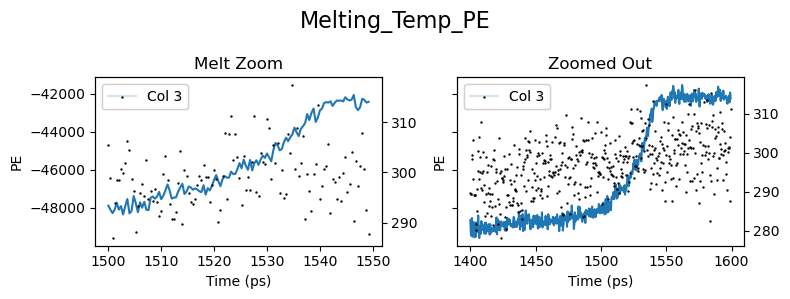

299.04560959199995 5.568355942319058


In [40]:
col = ["Time (ps)", "Potential", "Kinetic En.", "Temperature","Pressure","Density","T System"]
y = 3  # Index for temperature

# Load and filter data
data_prd = np.loadtxt('production/prd.xvg', comments=('#', '@'))
data_ice = np.loadtxt('production_ice/prd_ice.xvg', comments=('#', '@'))
data_water = np.loadtxt('production_water/prd_water.xvg', comments=('#', '@'))

#Temp_smooth = median_filter(T4[:, y], 31)
#Temp_smooth_e = median_filter(T4e[:, y], 51)

y = [1,3]
plot_subplots(data_prd[3750:3875,:],data_prd[3500:4000,:], ylabel='PE', xlabel=col[0], y = y, 
              use_twiny=True, titles = ['Melt Zoom','Zoomed Out'],
              sup_title ='Melting_Temp_PE', save=True,)
print(np.mean(data_prd[3750:3875,3]), np.std(data_prd[3750:3875,3]))

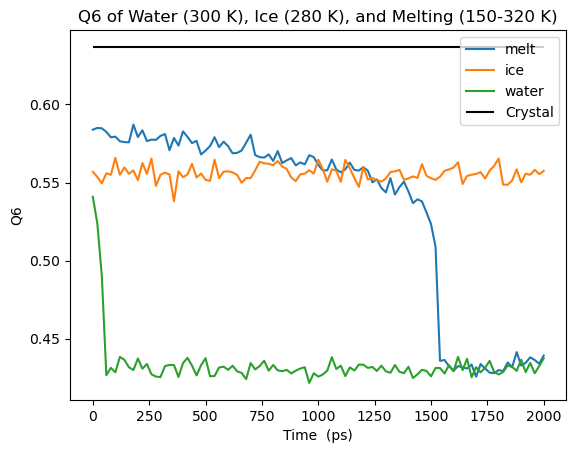

In [25]:
Q6 = {}
Q6['melt'] = np.loadtxt('Q6_pdr.out')
Q6['ice'] = np.loadtxt('Q6_pdr_ice.out')
Q6['water'] = np.loadtxt('Q6_pdr_water.out')

#plot_subplots(*Q6.values(), ylabel='Q6', xlabel='Time', sup_title ='TIP4P Q6', save=False)
for data in Q6:
    plt.plot(Q6[data][:,0]*20, Q6[data][:,1], label=data)
plt.legend()
plt.ylabel('Q6')

prd = np.loadtxt('production/prd.xvg', comments=('#', '@'))
ice = np.loadtxt('production_ice/prd_ice.xvg', comments=('#', '@'))
water = np.loadtxt('production_water/prd_water.xvg', comments=('#', '@'))
plt.hlines(0.636864, 0 , 2000, label='Crystal', color='k')
plt.twinx()
plt.scatter(prd[:,0], prd[:,3], label='T prd',s = 0.1, color='blue')
#plt.scatter(ice[:,0], ice[:,3], label='T ice',s = 0.1, color='orange')
#plt.scatter(water[:,0], water[:,3], label='T water',s = 0.1, color='green')
plt.xlabel('Time  (ps)')
plt.title('Q6 of Water (300 K), Ice (280 K), and Melting (150-320 K)')
#plt.ylabel('Temperatur (K)')

plt.legend()
plt.savefig('Q6_comparison.png')
plt.show()
y = [1,3]
data = {}
data['prd'] = np.loadtxt('production/prd.xvg', comments=('#', '@'))